<IPython.core.display.Javascript object>


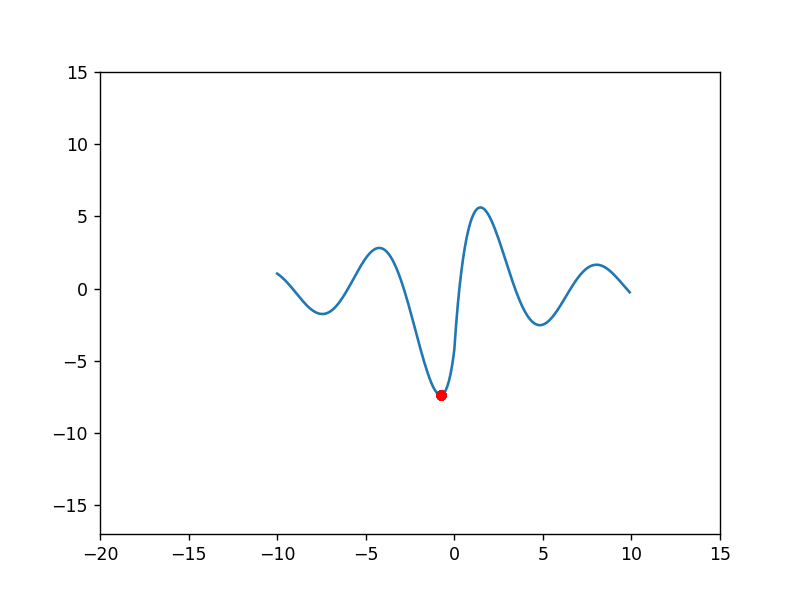

-0.7685752261112575 [-0.76857523 -0.76857523 -0.76857523 -0.76857523 -0.76857523 -0.76857523
 -0.76857523 -0.76857523 -0.76857523 -0.76857523]


In [1]:
# %load pso.py
%matplotlib notebook

import numpy as np
from matplotlib.pyplot import subplots

def f(x):
    return -15 * np.cos(x - 5) / (abs(x) + 1)

particles = 10

positions = np.random.uniform(-10, 10, particles)
velocities = np.random.uniform(-1, 1, particles)
positions_best = positions
num_iters = 50

w_min = 0.01
w_max = 0.1
c1 = 0
c2 = 0

gbest = positions[0]

for p in positions:
    if(f(p) < f(gbest)):
        gbest = p

fig, ax = subplots()
fig.show()

for k in range(num_iters):
    for i in range(particles):
        
        c1 = 2.5 - 2*(k/num_iters)
        c2 = 0.5 + 2*(k/num_iters)
        w = w_max-((w_max-w_min)*k)/num_iters
        
        m, n = np.random.uniform(0,1,1), np.random.uniform(0,1,1)
        
        velocities[i] = w*velocities[i] + c1*m*(positions_best[i] - positions[i]) + c2*n*(gbest - positions[i])
        positions[i] += velocities[i]

        if(f(positions[i]) < f(positions_best[i])):
            positions_best[i] = positions[i]

        if(f(positions_best[i]) < f(gbest)):
            gbest = positions_best[i]
        
        ax.clear()
        ax.axis([-20,15,-17,15])
        ax.plot(np.arange(-10, 10, 0.1), f(np.arange(-10, 10, 0.1)), '-')
        ax.plot(positions, f(positions), 'ro', markersize = 5)
        
        fig.canvas.draw()

print(gbest, positions_best)




